#
<div align=left>
    <img src="https://unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg" width=120 height=120>
</div>
<font size=5 color=k><strong>Aluno:</strong> Heitor Teixeira

<strong>Disciplina:</strong> Ciência de dados

<strong>Professor:</strong> Rilder Pires 

<strong>Assunto:</strong> Redes Convolucionais

<strong>Título:</strong> Previsão da idade óssea por imgs de raio-x

## 
<font size=5 color=blue> 1 - Observações

para maiores informações, foi adicionado um README no drive

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
import os
import random

## 
<font size=5 color=blue> 2 - importação dos csv e padronização dos arquivos

In [2]:


# script para adicionar extensões do arquivo nos csv
# e modificar a nomeclatura das colunas no csv de validacao
# para padronizar todas as colunas dos 3 arquivos
csv_treino = pd.read_csv('train.csv')
csv_validacao = pd.read_csv('Validation Dataset.csv')
csv_teste = pd.read_csv('test_dataset.csv')

display(csv_treino)
display(csv_validacao)
display(csv_teste)

,id,boneage,male
0,1377.png,180,False
1,1378.png,12,False
2,1379.png,94,False
3,1380.png,120,True
4,1381.png,82,False
...,...,...,...
12606,15605.png,50,False
12607,15606.png,113,False
12608,15608.png,55,False
12609,15609.png,150,True


,id,male,boneage
0,1386.png,False,30
1,1392.png,True,162
2,1397.png,False,18
3,1401.png,False,132
4,1410.png,True,57
...,...,...,...
1420,15592.png,False,42
1421,15601.png,False,132
1422,15607.png,True,186
1423,15611.png,False,120


,id,boneage,male
0,3128.jpg,11.0,True
1,3131.jpg,15.0,True
2,3133.jpg,25.0,True
3,3134.jpg,55.0,True
4,3136.jpg,83.0,True
...,...,...,...
1384,7288.jpg,153.0,True
1385,7289.jpg,108.0,True
1386,7290.jpg,80.0,False
1387,7291.jpg,80.0,False


In [3]:
csv_validacao.rename(columns={'Image ID': 'id', 'Bone Age (months)': 'boneage'}, inplace=True)

csv_treino['id'] = csv_treino['id'].astype(str) + '.png'
csv_validacao['id'] = csv_validacao['id'].astype(str) + '.png'
csv_teste['id'] = csv_teste['id'].astype(str) + '.jpg'

# salnvado novos arquivos
csv_treino.to_csv('train.csv', index=False)
csv_validacao.to_csv('Validation Dataset.csv', index=False)
csv_teste.to_csv('test_dataset.csv', index=False)


display(csv_treino)
display(csv_validacao)
display(csv_teste)

,id,boneage,male
0,1377.png.png,180,False
1,1378.png.png,12,False
2,1379.png.png,94,False
3,1380.png.png,120,True
4,1381.png.png,82,False
...,...,...,...
12606,15605.png.png,50,False
12607,15606.png.png,113,False
12608,15608.png.png,55,False
12609,15609.png.png,150,True


,id,male,boneage
0,1386.png.png,False,30
1,1392.png.png,True,162
2,1397.png.png,False,18
3,1401.png.png,False,132
4,1410.png.png,True,57
...,...,...,...
1420,15592.png.png,False,42
1421,15601.png.png,False,132
1422,15607.png.png,True,186
1423,15611.png.png,False,120


,id,boneage,male
0,3128.jpg.jpg,11.0,True
1,3131.jpg.jpg,15.0,True
2,3133.jpg.jpg,25.0,True
3,3134.jpg.jpg,55.0,True
4,3136.jpg.jpg,83.0,True
...,...,...,...
1384,7288.jpg.jpg,153.0,True
1385,7289.jpg.jpg,108.0,True
1386,7290.jpg.jpg,80.0,False
1387,7291.jpg.jpg,80.0,False


## 
<font size=5 color=blue> 3 - Análise exploratória

### 
<font size=5 color=green> 3.1 - mínimos e máximos

In [23]:
maximos_e_minimos = pd.DataFrame({
    'Máximo': [csv_treino['boneage'].max(), csv_validacao['boneage'].max(), csv_teste['boneage'].max()],
    'Mínimo': [csv_treino['boneage'].min(), csv_validacao['boneage'].min(), csv_teste['boneage'].min()]
}, index=['Treino', 'Validação', 'Teste'])

maximos_e_minimos


,Máximo,Mínimo
Treino,228.0,1.0
Validação,228.0,3.0
Teste,227.0,0.0


### 
<font size=5 color=green> 3.2 - juntando os dataframes

In [8]:
dados = pd.concat([csv_treino, csv_validacao, csv_teste], ignore_index=True)

display(dados.head())
display(dados.describe())

,id,boneage,male
0,1377.png.png,180.0,False
1,1378.png.png,12.0,False
2,1379.png.png,94.0,False
3,1380.png.png,120.0,True
4,1381.png.png,82.0,False


,boneage
count,15425.000000
mean,127.695948
std,42.967420
min,0.000000
25%,96.000000
50%,132.000000
75%,156.000000
max,228.000000


### 
<font size=5 color=green> 3.3 - distribuição por idade

In [15]:
intervalos = [0, 30, 60, 90, 120, 150, 180, 240]


dados['faixa_Etaria'] = pd.cut(dados['boneage'], bins=intervalos)


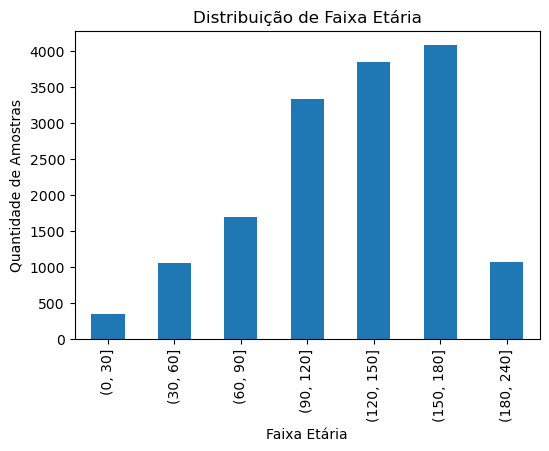

In [16]:
contagem_faixa_etaria = dados['faixa_Etaria'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
contagem_faixa_etaria.plot(kind='bar')
plt.title('Distribuição de Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Amostras')
plt.show()

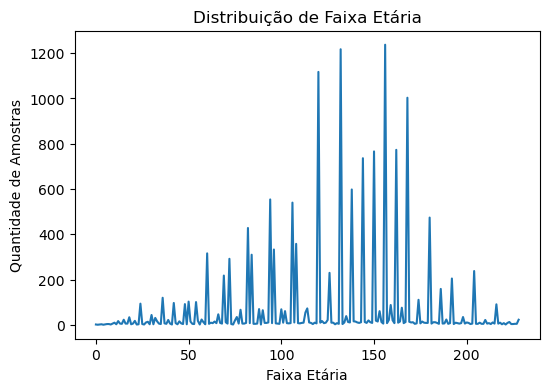

In [17]:
contagem_faixa_etaria = dados['boneage'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
contagem_faixa_etaria.plot(kind='line')
plt.title('distribuição de faixa etária')
plt.xlabel('faixa etária')
plt.ylabel('quantidade de amostras')
plt.show()

### 
<font size=5 color=green> 3.4 - distribuição por idade levando em consideracao o sexo

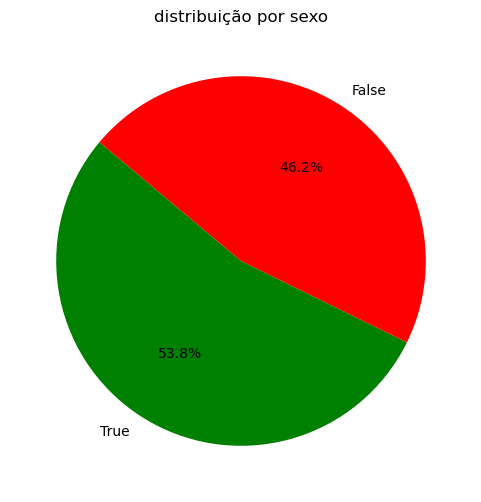

In [24]:
contagem_male = dados['male'].value_counts()

plt.figure(figsize=(6, 6))
contagem_male.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title('distribuição por sexo')
plt.ylabel('')  
plt.show()

#### 
<font size=5 color=orange> 3.4.1 masculino

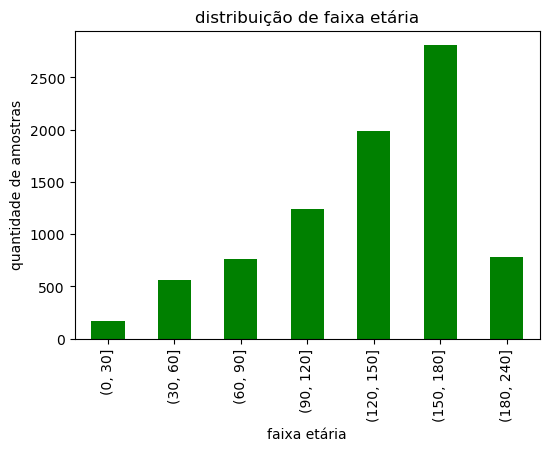

In [20]:
dados_masculino = dados[dados['male'] == True]
contagem_faixa_etaria_masc = dados_masculino['faixa_Etaria'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
contagem_faixa_etaria_masc.plot(kind='bar', color='green')
plt.title('distribuição de faixa etária')
plt.xlabel('faixa etária')
plt.ylabel('quantidade de amostras')
plt.show()

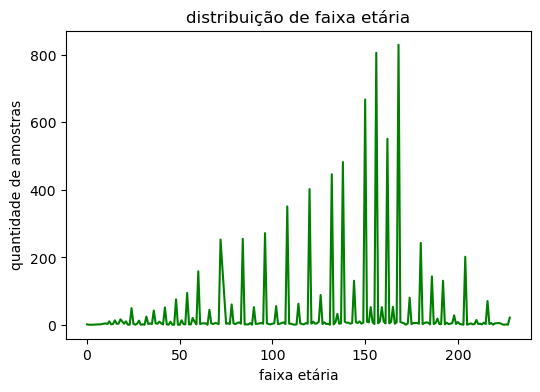

In [21]:
dados_masculino = dados[dados['male'] == True]
contagem_faixa_etaria_masc = dados_masculino['boneage'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
contagem_faixa_etaria_masc.plot(kind='line', color='green')
plt.title('distribuição de faixa etária')
plt.xlabel('faixa etária')
plt.ylabel('quantidade de amostras')
plt.show()

#### 
<font size=5 color=orange> 3.4.2 Feminino

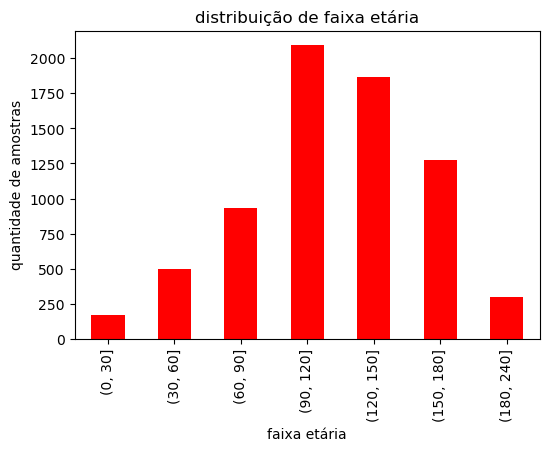

In [22]:
dados_masculino = dados[dados['male'] == False]
contagem_faixa_etaria_masc = dados_masculino['faixa_Etaria'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
contagem_faixa_etaria_masc.plot(kind='bar', color='red')
plt.title('distribuição de faixa etária')
plt.xlabel('faixa etária')
plt.ylabel('quantidade de amostras')
plt.show()

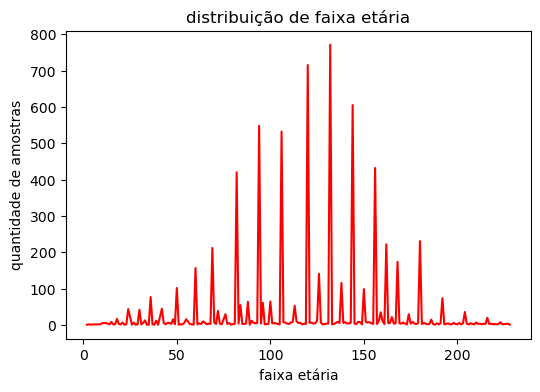

In [23]:
dados_masculino = dados[dados['male'] == False]
contagem_faixa_etaria_masc = dados_masculino['boneage'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
contagem_faixa_etaria_masc.plot(kind='line', color='red')
plt.title('distribuição de faixa etária')
plt.xlabel('faixa etária')
plt.ylabel('quantidade de amostras')
plt.show()

## 
<font size=5 color=blue> 4 - Imagens a serem analisadas

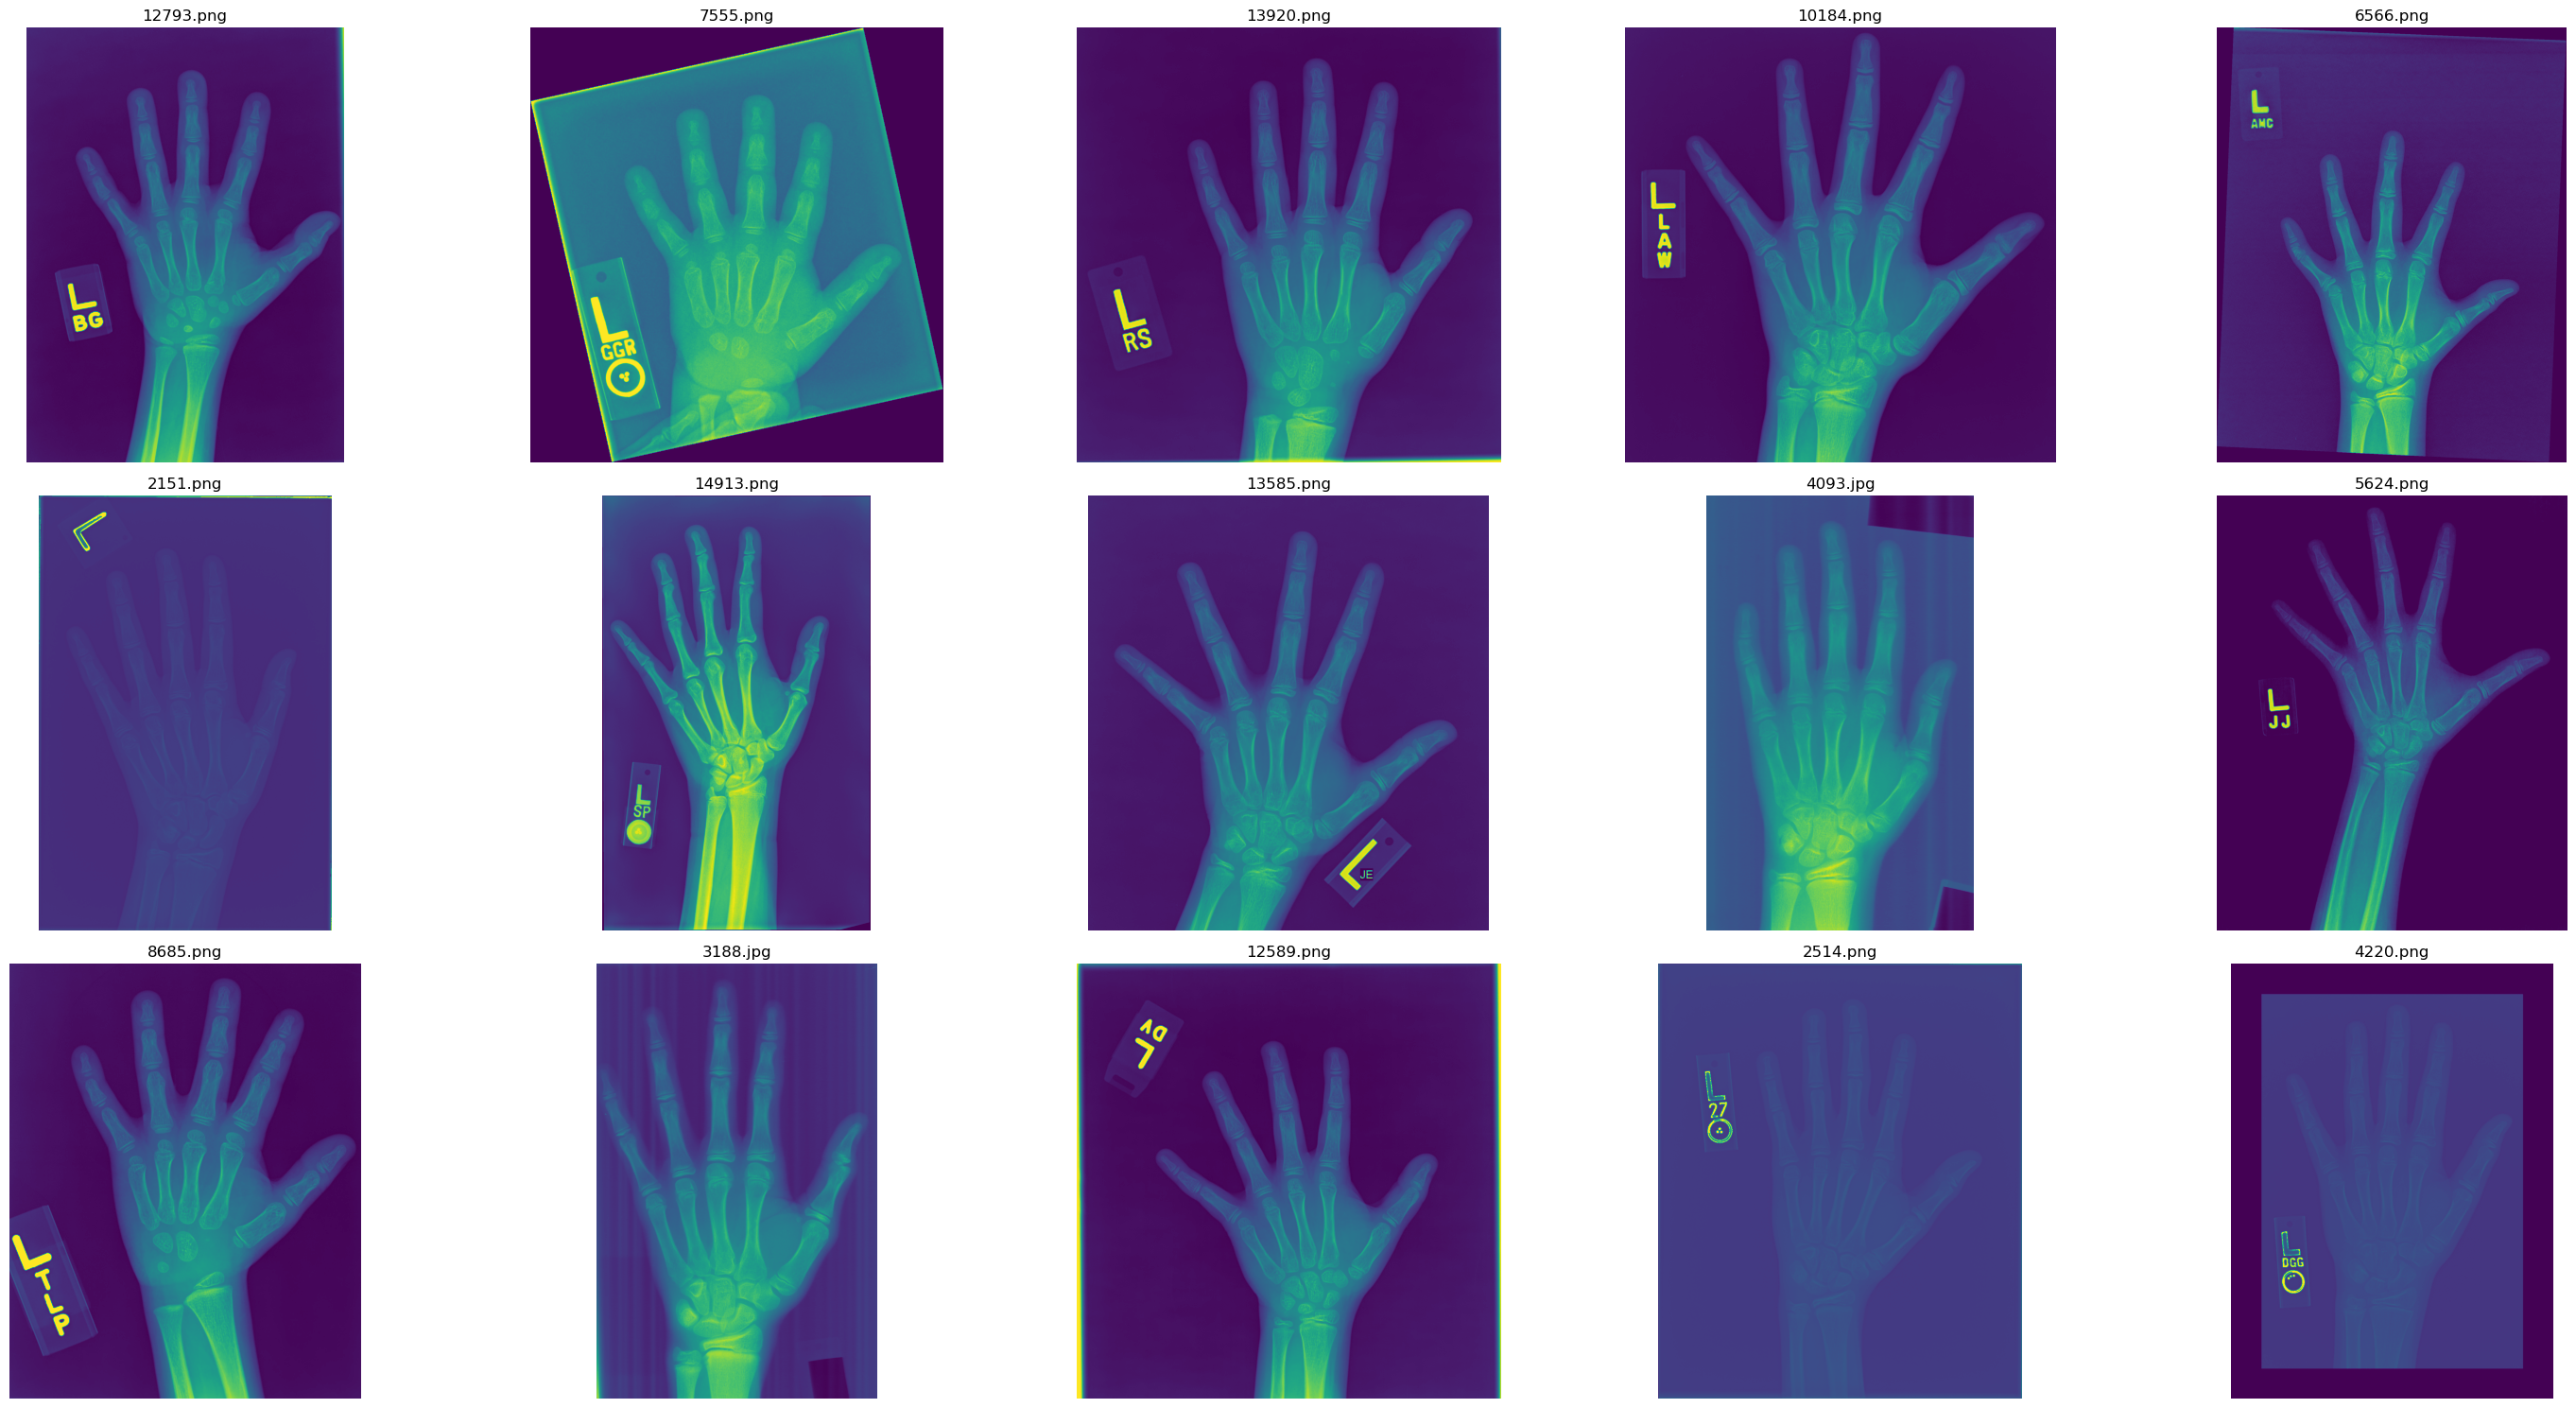

In [41]:
diretorio_imagens = 'imagens'
arquivos = os.listdir(diretorio_imagens)
imagens_selecionadas = random.sample(arquivos, 15)

plt.figure(figsize=(30, 15))


for i, nome_imagem in enumerate(imagens_selecionadas):
    img_path = os.path.join(diretorio_imagens, nome_imagem)
    img = mpimg.imread(img_path)
    plt.subplot(3, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(nome_imagem)

plt.tight_layout()
plt.show()

